In [31]:
import numpy as np
import pandas as pd
import pathlib as pl
from datetime import datetime,time,date
import psycopg2

import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)

In [2]:
datapath = pl.Path("/home/techstar/data/pyprojects/metro_cq")

In [3]:
datapath.glob?

Signature: datapath.glob(pattern)
Docstring:
Iterate over this subtree and yield all existing files (of any
kind, including directories) matching the given pattern.
File:      ~/anaconda3/lib/python3.6/pathlib.py
Type:      method


In [11]:
con= psycopg2.connect(database="metro",user="gpadmin",password="gpadmin",host="192.168.0.93",port="5432")

In [13]:
df = pd.read_sql("select t.date, ot.t30, t.sta, count(1)\
    from od_raw t\
    join olap_time ot on date_trunc('minute', t.time) = ot.t1\
    where od = 21 and date = '2016-12-01' and t.sta = 114\
    group by t.date, ot.t30, t.sta\
    order by t.date, ot.t30, t.sta;", con=con)

#con.close()

In [12]:
df = pd.read_sql("select t.date, ot.t15, count(1)\
    from od_raw t\
    join olap_time ot on date_trunc('minute', t.time) = ot.t1\
    where od = 21 \
    group by t.date, ot.t15\
    order by t.date, ot.t15;", con=con)
df
con.close()

In [16]:
df_new = df.copy()
df_new["time"]=pd.to_datetime(df.date.apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))+" "+ df.t15)
df_new['t15']=df.t15.apply(lambda x: pd.to_datetime(x).time())
#df_new.drop?
#df_new= df_new.drop(columns=["date","t30"]).set_index("time")
df_new= df_new.set_index("time")
#df_log = np.log(df_new)

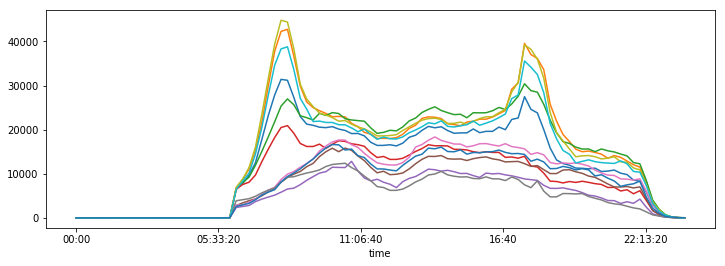

In [17]:
pylab.rcParams['figure.figsize'] = (12.0, 4.0)
for date in set(df_new["2017-1-21":].date.apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))):
    plt.plot(df_new[date].set_index("t15")['count'])
#df_new.set_index("t30").count

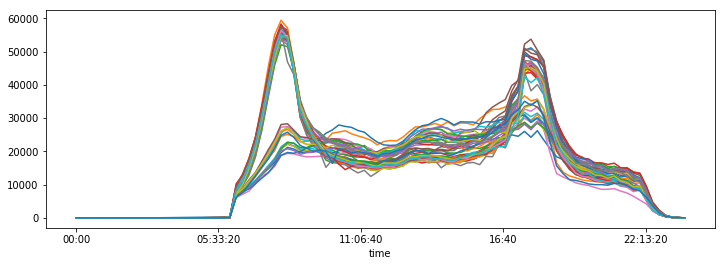

In [18]:
pylab.rcParams['figure.figsize'] = (12.0, 4.0)
for date in set(df_new[:"2017-1-20"].date.apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))):
    plt.plot(df_new[date].set_index("t15")['count'])
#df_new.set_index("t30").count

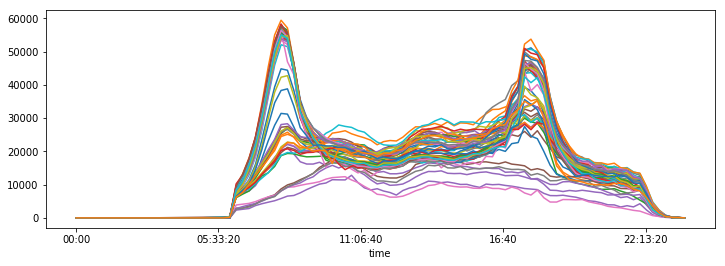

In [19]:
pylab.rcParams['figure.figsize'] = (12.0, 4.0)
for date in set(df_new.date.apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))):
    plt.plot(df_new[date].set_index("t15")['count'])
#df_new.set_index("t30").count

In [24]:
df_reshaped=df_new.pivot("date","t15","count")
#df_reshaped = df_reshaped.dropna()

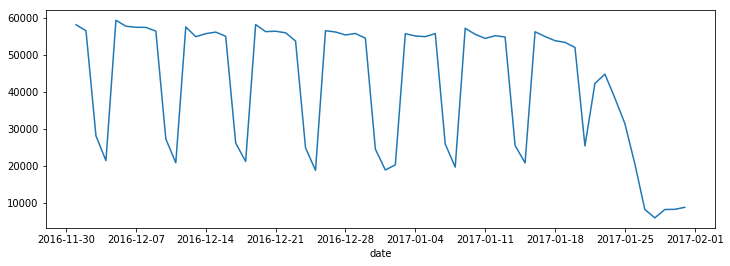

In [21]:
df_reshaped[time(8,0,0)].plot()

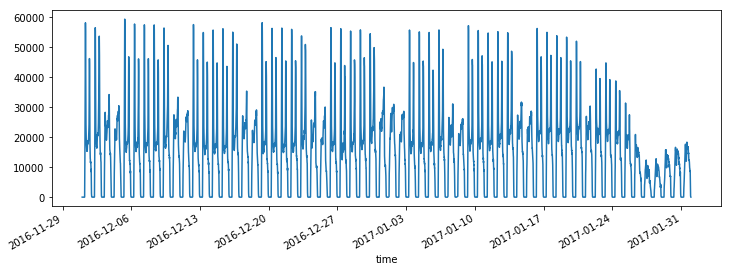

In [22]:
df_new['count'].plot()

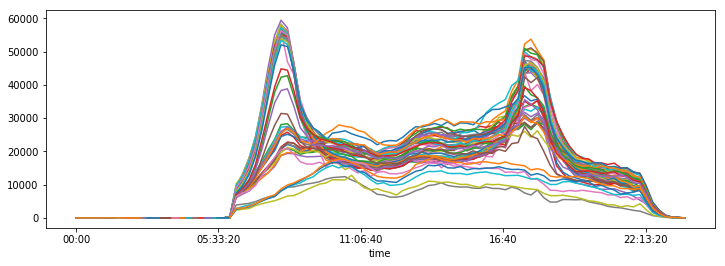

In [37]:
for i in range(len(df_reshaped)):
    plt.plot(df_reshaped.iloc[i])

In [32]:
date(2017,1,20)

datetime.date(2017, 1, 20)